In [27]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import os

In [28]:
groceries = pd.read_csv("groceries.csv",delimiter=',')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 6, saw 5


In [29]:
import csv
with open('groceries.csv', 'r') as f:
    groceries = list(csv.reader(f, delimiter=','))

In [30]:
groceries

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [31]:
groceries=pd.DataFrame(groceries)
groceries

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,None,None,None,None,None,None,None,None,None,None
9831,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None
9833,semi-finished bread,bottled water,soda,bottled beer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [32]:
groceries.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Revising the Data frame by  removing  'None' and replacing with Blank

In [33]:
groceries =groceries.replace(np.nan, '', regex=True)
groceries

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,...,,,,,,,,,,
1,tropical fruit,yogurt,coffee,,,,,,,,...,,,,,,,,,,
2,whole milk,,,,,,,,,,...,,,,,,,,,,
3,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,...,,,,,,,,,,
4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,,,,,,,,,,
9831,cooking chocolate,,,,,,,,,,...,,,,,,,,,,
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,,,,,,,,,,
9833,semi-finished bread,bottled water,soda,bottled beer,,,,,,,...,,,,,,,,,,


In [34]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       9835 non-null   object
 2   2       9835 non-null   object
 3   3       9835 non-null   object
 4   4       9835 non-null   object
 5   5       9835 non-null   object
 6   6       9835 non-null   object
 7   7       9835 non-null   object
 8   8       9835 non-null   object
 9   9       9835 non-null   object
 10  10      9835 non-null   object
 11  11      9835 non-null   object
 12  12      9835 non-null   object
 13  13      9835 non-null   object
 14  14      9835 non-null   object
 15  15      9835 non-null   object
 16  16      9835 non-null   object
 17  17      9835 non-null   object
 18  18      9835 non-null   object
 19  19      9835 non-null   object
 20  20      9835 non-null   object
 21  21      9835 non-null   object
 22  22      9835 non-null   

In [ ]:
# Relace None with zero cannot be done without converting to Numeric data type. So Convert into string/Split /Apply dummies 

In [35]:
groceries
arr = []
for i in range(0, 9835):
    arr.append([str(groceries.values[i,u]) for u in range(1, 31)]) 

In [36]:
arr

[['semi-finished bread',
  'margarine',
  'ready soups',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['yogurt',
  'coffee',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['yogurt',
  'cream cheese ',
  'meat spreads',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['whole milk',
  'condensed milk',
  'long life bakery product',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  

In [37]:
ser  = pd.DataFrame(pd.Series(arr))
ser
ser.columns = ["chain"]
ser

,chain
0,"[semi-finished bread, margarine, ready soups, ..."
1,"[yogurt, coffee, , , , , , , , , , , , , , , ,..."
2,"[, , , , , , , , , , , , , , , , , , , , , , ,..."
3,"[yogurt, cream cheese , meat spreads, , , , , ..."
4,"[whole milk, condensed milk, long life bakery ..."
...,...
9830,"[chicken, beef, hamburger meat, citrus fruit, ..."
9831,"[, , , , , , , , , , , , , , , , , , , , , , ,..."
9832,"[citrus fruit, other vegetables, butter, yogur..."
9833,"[bottled water, soda, bottled beer, , , , , , ..."


In [38]:
groceries1 = ser['chain'].str.join(sep=',').str.get_dummies(sep=',')
groceries1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Apriori Algorithm

In [39]:
apriori(groceries1, min_support=0.1)

,support,itemsets
0,0.146721,(102)
1,0.149771,(122)
2,0.144484,(138)
3,0.182613,(165)
4,0.116624,(166)


In [ ]:
# Model 1 Support =0.01 and lift = .7

In [42]:
frequent=apriori(groceries1,  min_support=0.01, use_colnames = True)
frequent['length'] = frequent['itemsets'].apply(lambda x: len(x))
frequent

,support,itemsets,length
0,0.026335,(UHT-milk),1
1,0.016675,(baking powder),1
2,0.021556,(beef),1
3,0.020946,(berries),1
4,0.017895,(beverages),1
...,...,...,...
212,0.013320,"(whipped/sour cream, whole milk, other vegetab...",3
213,0.019014,"(other vegetables, whole milk, yogurt)",3
214,0.013726,"(whole milk, rolls/buns, yogurt)",3
215,0.012303,"(whole milk, root vegetables, yogurt)",3


In [ ]:
#Rules and Confident Ratio

In [43]:
rules1=association_rules(frequent, metric="lift", min_threshold=0.7)
rules1['length_con'] = rules1['consequents'].apply(lambda x: len(x)) # added length of consequents
rules1['length_ant'] = rules1['antecedents'].apply(lambda x: len(x)) # added length of antecedents
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
0,(other vegetables),(beef),0.146721,0.021556,0.010066,0.068607,3.182785,0.006903,1.050517,1,1
1,(beef),(other vegetables),0.021556,0.146721,0.010066,0.466981,3.182785,0.006903,1.600842,1,1
2,(whole milk),(beef),0.182613,0.021556,0.010880,0.059577,2.763859,0.006943,1.040430,1,1
3,(beef),(whole milk),0.021556,0.182613,0.010880,0.504717,2.763859,0.006943,1.650343,1,1
4,(bottled water),(bottled beer),0.093238,0.062430,0.013726,0.147219,2.358145,0.007906,1.099427,1,1
...,...,...,...,...,...,...,...,...,...,...,...
333,"(whole milk, yogurt)",(tropical fruit),0.047077,0.055923,0.010473,0.222462,3.978029,0.007840,1.214188,1,2
334,"(tropical fruit, yogurt)",(whole milk),0.017590,0.182613,0.010473,0.595376,3.260312,0.007261,2.020113,1,2
335,(whole milk),"(tropical fruit, yogurt)",0.182613,0.017590,0.010473,0.057350,3.260312,0.007261,1.042178,2,1
336,(tropical fruit),"(whole milk, yogurt)",0.055923,0.047077,0.010473,0.187273,3.978029,0.007840,1.172501,2,1


In [44]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
194,(tropical fruit),(pip fruit),0.055923,0.047483,0.013625,0.243636,5.130971,0.010969,1.259337,1,1
195,(pip fruit),(tropical fruit),0.047483,0.055923,0.013625,0.286938,5.130971,0.010969,1.323976,1,1
336,(tropical fruit),"(whole milk, yogurt)",0.055923,0.047077,0.010473,0.187273,3.978029,0.007840,1.172501,2,1
333,"(whole milk, yogurt)",(tropical fruit),0.047077,0.055923,0.010473,0.222462,3.978029,0.007840,1.214188,1,2
289,(root vegetables),"(other vegetables, whole milk)",0.079715,0.060702,0.018709,0.234694,3.866356,0.013870,1.227350,2,1
284,"(other vegetables, whole milk)",(root vegetables),0.060702,0.079715,0.018709,0.308208,3.866356,0.013870,1.330290,1,2
69,(citrus fruit),(root vegetables),0.036706,0.079715,0.011286,0.307479,3.857217,0.008360,1.328891,1,1
68,(root vegetables),(citrus fruit),0.079715,0.036706,0.011286,0.141582,3.857217,0.008360,1.122174,1,1
259,(butter),"(other vegetables, whole milk)",0.047687,0.060702,0.010778,0.226013,3.723343,0.007883,1.213584,2,1
254,"(other vegetables, whole milk)",(butter),0.060702,0.047687,0.010778,0.177554,3.723343,0.007883,1.157904,1,2


In [ ]:
# Highest Lift Ratio is 5.13 -Persons who buy  tropical fruit will also buy pip fruit
# Highest Lift Ratio is 5.13 -Persons Who buy pip fruit  will also buy tropical fruit

In [ ]:
#Support Vs Confidence

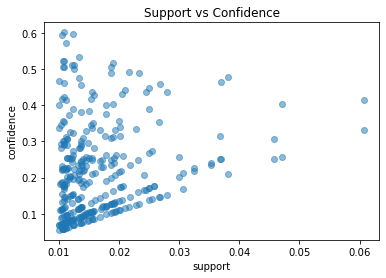

In [45]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [ ]:
#Support vs Lift

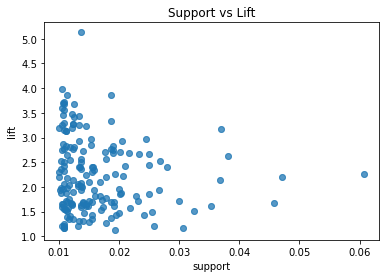

In [46]:
plt.scatter(rules1['support'], rules1['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [47]:
#Lift Vs confidence

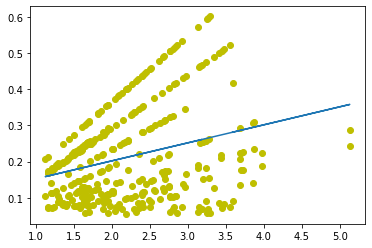

In [48]:
import numpy as np
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'], 
 fit_fn(rules1['lift']))